<a href="https://colab.research.google.com/github/podo47/Machine-Learning-Assignment-II/blob/main/ML__hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
from collections import Counter
%matplotlib inline

In [8]:
import warnings
warnings.filterwarnings('ignore')

# Import data

In [9]:
data="/content/drive/MyDrive/ML_hw4/train.csv"
train_df = pd.read_csv(data)
train_df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


# Exploratory data analysis

In [10]:
# Printing the shape of the train dataset
print(train_df.shape)

(58592, 44)


In [11]:
# View summary of the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [12]:
# Check for missing values:
train_df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

**Explore categorical variables**

In [13]:
categorical = train_df.select_dtypes(include =[object])
print("There are {} categorical variables".format(categorical.shape[1]))
print('The categorical variables are :\n',categorical.columns)

There are 28 categorical variables
The categorical variables are :
 Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')


**Explore numerical variables**

In [14]:
numerical = train_df.select_dtypes(include =[np.float64,np.int64])
print("There are {} numerical variables".format(numerical.shape[1]))
print('The numerical variables are :\n',numerical.columns)

There are 16 numerical variables
The numerical variables are :
 Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')


**Check if data is imbalanced**

0    54844
1     3748
Name: is_claim, dtype: int64


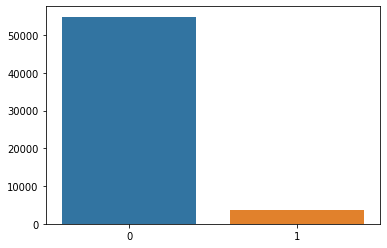

In [15]:
print(train_df.is_claim.value_counts())
sns.barplot(x = [0, 1], y = [54844, 3784])

# Data preprocessing

**Drop useless features**

In [16]:
train = train_df.copy()
train.drop(['policy_id'], axis=1, inplace=True)

**Label Encoding**

In [17]:
# Ordinal variables
train['transmission_type'] = train['transmission_type'].map({'Manual': 0, 'Automatic': 1})
train['steering_type'] = train['steering_type'].map({'Manual': 0, 'Power': 1, 'Electric': 2})

train[['max_torque_Nm','max_torque_rpm']] = train["max_torque"].apply(lambda n: pd.Series(str(n).split("@")))
train.drop(["max_torque"], axis=1, inplace= True)
train['max_torque_Nm'] = train['max_torque_Nm'].str[:-2].astype(float)
train['max_torque_rpm'] = train['max_torque_rpm'].str[:-3].astype(int)

train[['max_power_bhp','max_power_rpm']] = train["max_power"].apply(lambda n: pd.Series(str(n).split("@")))
train.drop(["max_power"], axis=1, inplace= True)
train['max_power_rpm'] = train['max_power_rpm'].str[:-3].astype(int)
train['max_power_bhp'] = train['max_power_bhp'].str[:-3].astype(float)

**One-hot Encoding**

In [18]:
train = pd.get_dummies(train, drop_first=True)

In [19]:
train.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,transmission_type,gear_box,...,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
0,0.515874,0.05,0.644231,4990,1,2,796,3,0,5,...,0,0,0,0,0,1,0,0,0,1
1,0.672619,0.02,0.375000,27003,1,2,796,3,0,5,...,0,0,0,0,0,1,0,0,0,1
2,0.841110,0.02,0.384615,4076,1,2,796,3,0,5,...,0,0,0,0,0,1,0,0,0,1
3,0.900277,0.11,0.432692,21622,1,2,1197,4,1,5,...,0,1,1,1,1,1,1,1,1,1
4,0.596403,0.11,0.634615,34738,2,2,999,3,1,5,...,0,0,0,1,1,1,0,1,1,1


**Train test split**

In [20]:
# Shuffle dataset 
shuffle_train = train.sample(frac=1,random_state=1).reset_index(drop=True)

# Define size for train set 
train_size = int(0.7 * len(train))

# Split dataset 
train_set = shuffle_train[:train_size]
test_set = shuffle_train[train_size:]

In [21]:
train_set.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,transmission_type,gear_box,...,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes
0,0.429286,0.06,0.365385,6112,1,2,1197,4,0,5,...,0,0,1,1,1,1,1,1,1,1
1,1.208874,0.10,0.423077,4076,2,2,999,3,1,5,...,0,0,0,1,1,1,0,1,1,1
2,0.518087,0.11,0.298077,34738,1,2,1197,4,0,5,...,0,0,1,1,1,1,1,1,1,1
3,0.700774,0.14,0.442308,7788,1,2,998,3,0,5,...,0,0,0,1,1,1,0,0,1,1
4,0.893027,0.07,0.461538,8794,3,6,1493,4,1,6,...,1,1,1,1,1,1,1,0,1,1


In [22]:
train_set.shape,test_set.shape

((41014, 88), (17578, 88))

**Declare feature vector and target variable**

In [23]:
X = train_set.drop(['is_claim'], axis=1)
y = train_set['is_claim']
X_test_init = test_set.copy()
X_test = X_test_init.drop(['is_claim'], axis=1)
y_test = X_test_init['is_claim']

**Use SMOTE to handle imbalanced data**

In [24]:
from imblearn.over_sampling import SMOTE

Original training dataset shape :
0    38411
1     2603
Name: is_claim, dtype: int64
Resampled training dataset shape :
0    38411
1    30728
Name: is_claim, dtype: int64


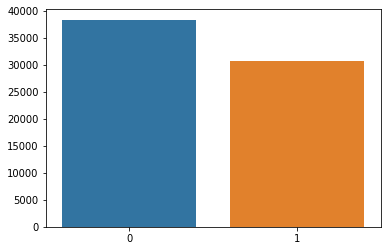

In [25]:
balance = SMOTE(random_state=7, sampling_strategy=0.8)
X_train, y_train = balance.fit_resample(X,y)
print('Original training dataset shape :\n{}'.format(y.value_counts()))
print('Resampled training dataset shape :\n{}'.format(y_train.value_counts()))
sns.barplot(x = [0, 1], y = [38411, 30728])

# Naïve Bayer classifier

**Model training**

In [26]:
import math
class Gaussian_Bayes():
  def __init__(self):
    pass
  # Build the model
  def fit(self,X_train,y_train):
    self.training_data = X_train.copy()
    self.gb_y_train = pd.DataFrame(y_train.values, columns = ['claim'])
    self.training_data['claim'] = y_train.values
    self.find_mean = self.training_data.groupby("claim").mean() # Mean for gaussian
    self.find_var = self.training_data.groupby("claim").var() # Variance for gaussian
    self.prior_prob = self.Prior()
    return self
  
  # Prior probability
  def Prior(self):
    label = self.gb_y_train['claim'].value_counts().sort_index()
    pri = []
    for c in label :
      pri.append(c/sum(label))
    prior_prob = np.array(pri)
    return prior_prob
    
  # Calculate with gaussian distribution
  def Distribution(self,mu,variance,feature):
    norm = 1/np.sqrt(2*math.pi*variance)*np.exp(-(feature-mu)**2/(2*variance)) # Normal distribution
    norm = pd.DataFrame(norm).prod(axis=1) # P(x1,x2,...,xn|yi)
    return norm

  # Prediction
  def Predict(self,X_test):
    final_prob = []
    for feature in X_test.values :
      prob=self.Distribution(self.find_mean,self.find_var,feature)*self.prior_prob
      final_prob.append(prob)
    result=np.argmax(final_prob, axis=1)  # argmax for prediction
    return result

In [27]:
nb = Gaussian_Bayes()

In [ ]:
nb.fit(X_train,y_train)
# Test set prediction
y_test_nb = nb.Predict(X_test)
# Train set prediction
y_train_nb = nb.Predict(X_train)

**Check accuracy score**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Train set accuracy
train_accuracy_nb = accuracy_score(y_train,y_train_nb)
# Test set accuracy
test_accuracy_nb = accuracy_score(y_test,y_test_nb)

print('Test set accuracy : {0:0.4f}'. format(test_accuracy_nb))
print('Train set accuracy : {0:0.4f}'. format(train_accuracy_nb))

In [ ]:
#Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_test, y_test_nb)
# Visualize confusion matrix 
confusion_matrix_nb = pd.DataFrame(data=cm_nb, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(confusion_matrix_nb, annot=True, fmt='d', cmap='YlGnBu')

# Random Forest Classifier

Record the information of each node

In [ ]:
class Node:
    def __init__(self, feature=None, threshold=None, data_left=None, data_right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.data_left = data_left
        self.data_right = data_right
        self.gain = gain
        self.value = value

**DecisionTree**

In [ ]:
class DecisionTree:
    def __init__(self, min_samples_split=25, max_depth=5):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.root = None

    # Calculate entropy   
    @staticmethod
    def entropy(s):
        counts = np.bincount(np.array(s, dtype=np.int64))
        # Probabilities of each class label
        percentages = counts / len(s)
        # Caclulate entropy
        entropy = 0
        for pct in percentages:
            if pct > 0:
                entropy += pct * np.log2(pct)
        return -entropy
    
    # Calculate information gain
    def information_gain(self, parent, left_child, right_child):
        num_left = len(left_child) / len(parent)
        num_right = len(right_child) / len(parent)
        
        info_gain = self.entropy(parent) - (num_left * self.entropy(left_child) + num_right * self.entropy(right_child))
        return info_gain
    # Calculate the best split
    def best_split(self, X, y):
        best_split = {}
        best_info_gain = -1
        n_rows, n_cols = X.shape
        
        for f_idx in range(n_cols):
            X_curr = X[:, f_idx]
            for threshold in np.unique(X_curr):
                # Construct a dataset and split it to the left and right parts
                df = np.concatenate((X, y.reshape(1, -1).T), axis=1)
                df_left = np.array([row for row in df if row[f_idx] <= threshold])
                df_right = np.array([row for row in df if row[f_idx] > threshold])

                if len(df_left) > 0 and len(df_right) > 0:
                    y = df[:, -1]
                    y_left = df_left[:, -1]
                    y_right = df_right[:, -1]

                    # Caclulate the information gain and save the split parameters
                    gain = self.information_gain(y, y_left, y_right)
                    if gain > best_info_gain:
                        best_split = {
                            'feature_index': f_idx,
                            'threshold': threshold,
                            'df_left': df_left,
                            'df_right': df_right,
                            'gain': gain
                        }
                        best_info_gain = gain
        return best_split
    
    # Build decision tree
    def build(self, X, y, depth=0):
        n_rows, n_cols = X.shape
        
        # Check to see if a node should be leaf node
        if n_rows >= self.min_samples_split and depth <= self.max_depth:
            # Get the best split
            best = self.best_split(X, y)
            # If the split isn't pure
            if best['gain'] > 0:
                # Build a tree on the left
                left = self.build(
                    X=best['df_left'][:, :-1], 
                    y=best['df_left'][:, -1], 
                    depth=depth + 1
                )
                right = self.build(
                    X=best['df_right'][:, :-1], 
                    y=best['df_right'][:, -1], 
                    depth=depth + 1
                )
                return Node(
                    feature=best['feature_index'], 
                    threshold=best['threshold'], 
                    data_left=left, 
                    data_right=right, 
                )
        # Leaf node: value is the most common target value 
        return Node(value=Counter(y).most_common(1)[0][0])
            
    # Train model
    def fit(self, X, y):
        self.root = self.build(X, y)

    # Predict one raw of X    
    def pre_predict(self, x, tree):
        # Leaf node
        if tree.value != None:
            return tree.value
        feature_value = x[tree.feature]
        
        # Go to the left
        if feature_value <= tree.threshold:
            return self.pre_predict(x=x, tree=tree.data_left)
        
        # Go to the right
        if feature_value > tree.threshold:
            return self.pre_predict(x=x, tree=tree.data_right)
        
    def predict(self, X):
        # Call the pre_predict() function for whole X
        return [self.pre_predict(x, self.root) for x in X]

In [ ]:
class RandomForest:
    def __init__(self, num_trees=5, min_samples_split=25, max_depth=5):
        self.num_trees = num_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        # Trained decision trees
        self.decision_trees = []

    # Boostrap    
    @staticmethod
    def _sample(X, y):
        n_rows, n_cols = X.shape
        samples = np.random.choice(a=n_rows, size=n_rows, replace=True)
        return X[samples], y[samples]

    # Train model    
    def fit(self, X, y):
        # Reset decision tree model
        if len(self.decision_trees) > 0:
            self.decision_trees = []
            
        # Build each tree 
        num_built = 0
        while num_built < self.num_trees:
            try:
                clf = DecisionTree(
                    min_samples_split=self.min_samples_split,
                    max_depth=self.max_depth
                )
                _X, _y = self._sample(X, y)
                # Train
                clf.fit(_X, _y)
                # Save the classifier
                self.decision_trees.append(clf)
                num_built += 1
            except Exception as e:
                continue
    
    def predict(self, X):
        # Make predictions with every tree in the forest
        y = []
        for tree in self.decision_trees:
            y.append(tree.predict(X))
        
        y = np.swapaxes(a=y, axis1=0, axis2=1)
        
        # Majority voting 
        predictions = []
        for preds in y:
            counter = Counter(x)
            predictions.append(counter.most_common(1)[0][0])
        return predictions

**Test**

In [ ]:
# Model training
rfc_scratch = RandomForest()
rfc_scratch.fit(X_train, y_train)
# Test set prediction
y_test_rfc_scratch = rfc_scratch.predict(X_test)
# Train set prediction
y_train_rfc_scratch = rfc_scratch.predict(X_train)

In [ ]:
# Train set accuracy
train_accuracy_rfc_scratch = accuracy_score(y_train,y_train_rfc_scratch)
# Test set accuracy
test_accuracy_rfc_scratch = accuracy_score(y_test,y_test_rfc_scratch)

print('Test set accuracy : {0:0.4f}'. format(test_accuracy_rfc_scratch))
print('Train set accuracy : {0:0.4f}'. format(train_accuracy_rfc_scratch))

# Random Forest Classifier (sklearn)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=100,
              criterion='gini',max_depth=10,max_features='log2',
              min_samples_leaf=3,min_samples_split=10,random_state=17)                      

In [ ]:
# Model training
rfc.fit(X_train,y_train)
# Test set prediction
y_test_rfc = rfc.predict(X_test)
# Train set prediction
y_train_rfc = rfc.predict(X_train)

In [ ]:
# Train set accuracy
train_accuracy_rfc = accuracy_score(y_train,y_train_rfc)
# Test set accuracy
test_accuracy_rfc = accuracy_score(y_test,y_test_rfc)

print('Test set accuracy : {0:0.4f}'. format(test_accuracy_rfc))
print('Train set accuracy : {0:0.4f}'. format(train_accuracy_rfc))

In [ ]:
# Visualize confusion matrix 
cm_rfc = confusion_matrix(y_test, y_test_rfc)
confusion_matrix_rfc = pd.DataFrame(data=cm_rfc, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(confusion_matrix_rfc, annot=True, fmt='d', cmap='YlGnBu')

# XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(n_estimators=100, learning_rate= 0.4)
# Model training
xgb.fit(X_train, y_train)
# Test set prediction
y_test_xgb = xgb.predict(X_test)
# Train set prediction
y_train_xgb = xgb.predict(X_train)

In [ ]:
# Train set accuracy
train_accuracy_xgb = accuracy_score(y_train,y_train_xgb)
# Test set accuracy
test_accuracy_xgb = accuracy_score(y_test,y_test_xgb)

print('Test set accuracy : {0:0.4f}'. format(test_accuracy_xgb))
print('Train set accuracy : {0:0.4f}'. format(train_accuracy_xgb))

In [ ]:
# Visualize confusion matrix 
cm_xgb = confusion_matrix(y_test, y_test_xgb)
confusion_matrix_xgb = pd.DataFrame(data=cm_xgb, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(confusion_matrix_xgb, annot=True, fmt='d', cmap='YlGnBu')

# Catboost

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

In [ ]:
cbc = CatBoostClassifier(iterations=100,learning_rate=0.4,verbose=0 )                  
# Model training
cbc.fit(X_train,y_train)
# Test set prediction
y_test_cbc = cbc.predict(X_test)
# Train set prediction
y_train_cbc = cbc.predict(X_train)

In [ ]:
# Train set accuracy
train_accuracy_cbc = accuracy_score(y_train,y_train_cbc)
# Test set accuracy
test_accuracy_cbc = accuracy_score(y_test,y_test_cbc)

print('Test set accuracy : {0:0.4f}'. format(test_accuracy_cbc))
print('Train set accuracy : {0:0.4f}'. format(train_accuracy_cbc))

In [ ]:
# Visualize confusion matrix 
cm_cbc = confusion_matrix(y_test, y_test_cbc)
confusion_matrix_cbc = pd.DataFrame(data=cm_cbc, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(confusion_matrix_cbc, annot=True, fmt='d', cmap='YlGnBu')

# LightGBM

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

In [ ]:
lgbm = lgb.LGBMClassifier(n_estimators = 100,learning_rate = 0.4)
# Model training
lgbm.fit(X_train, y_train)
# Test set prediction
y_test_lgbm = lgbm.predict(X_test)
# Train set prediction
y_train_lgbm = lgbm.predict(X_train)

In [ ]:
# Train set accuracy
train_accuracy_lgbm = accuracy_score(y_train,y_train_lgbm)
# Test set accuracy
test_accuracy_lgbm = accuracy_score(y_test,y_test_lgbm)

print('Test set accuracy : {0:0.4f}'. format(test_accuracy_lgbm))
print('Train set accuracy : {0:0.4f}'. format(train_accuracy_lgbm))

In [ ]:
# Visualize confusion matrix 
cm_lgbm = confusion_matrix(y_test, y_test_lgbm)
confusion_matrix_lgbm = pd.DataFrame(data=cm_lgbm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(confusion_matrix_lgbm, annot=True, fmt='d', cmap='YlGnBu')

# K-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
X_cv = train.drop(['is_claim'], axis=1)
y_cv = train['is_claim']

In [ ]:
balance_cv = SMOTE(random_state=7, sampling_strategy=0.8)
X_cvb, y_cvb = balance_cv.fit_resample(X_cv,y_cv)
print('Resampled dataset shape :\n{}'.format(y_cvb.value_counts()))
sns.barplot(x = [0, 1], y = [54844, 43875])

In [ ]:
def cross_validation(model, cv_X, cv_y, cv_value):

      score = ['accuracy']
      results = cross_validate(estimator = model,X = cv_X, y = cv_y, cv = cv_value,
                               scoring = score, return_train_score = True)
      print("{} Fold Mean Training Accuracy : ".format(cv_value),results['train_accuracy'].mean()*100) 
      return results['train_accuracy'].mean()*100       
    

**Random forest classifier (sklearn)**

In [ ]:
rfc_result_3 = cross_validation(rfc, X_cvb, y_cvb, 3)
rfc_result_5 = cross_validation(rfc, X_cvb, y_cvb, 5)
rfc_result_10 = cross_validation(rfc, X_cvb, y_cvb, 10)

**XGBoost**

In [ ]:
xgb_result_3 = cross_validation(xgb, X_cvb, y_cvb, 3)
xgb_result_5 = cross_validation(xgb, X_cvb, y_cvb, 5)
xgb_result_10 = cross_validation(xgb, X_cvb, y_cvb, 10)

**CatBoost**

In [ ]:
cbc_result_3 = cross_validation(cbc, X_cvb, y_cvb, 3)
cbc_result_5 = cross_validation(cbc, X_cvb, y_cvb, 5)
cbc_result_10 = cross_validation(cbc, X_cvb, y_cvb, 10)

**LightGBM**

In [ ]:
lgbm_result_3 = cross_validation(lgbm, X_cvb, y_cvb, 3)
lgbm_result_5 = cross_validation(lgbm, X_cvb, y_cvb, 5)
lgbm_result_10 = cross_validation(lgbm, X_cvb, y_cvb, 10)

**Naive Bayer**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
def NB_Kfold(k):
  kf_nb = KFold(n_splits=k)
  acc_score = []
  for train_index, test_index in kf_nb.split(X_cvb):
    X_train_nb_kv, X_test_nb_kv = X_cvb.iloc[train_index,:], X_cvb.iloc[test_index,:]
    y_train_nb_kv, y_test_nb_kv = y_cvb[train_index], y_cvb[test_index]

    nb.fit(X_train_nb_kv,y_train_nb_kv)
    nb_kv_pred = nb.Predict(X_test_nb_kv)

    acc_kv = accuracy_score(y_test_nb_kv,nb_kv_pred)
    acc_score.append(acc_kv)
      
  avg_acc_score = sum(acc_score)/k*100
  print("{} Fold Mean Training Accuracy : ".format(k),avg_acc_score)
  return avg_acc_score

In [ ]:
nb_kv3 = NB_Kfold(3)
nb_kv5 = NB_Kfold(5)
nb_kv10 = NB_Kfold(10)

**Conclusion - kfold**

In [ ]:
kfold_df = pd.DataFrame([
    ['Naive Bayer', 'k=3', nb_kv3],
    ['Naive Bayer', 'k=5', nb_kv5],
    ['Naive Bayer', 'k=10', nb_kv10],
    ['Random forest(sklearn)', 'k=3', rfc_result_3],
    ['Random forest(sklearn)', 'k=5', rfc_result_5],
    ['Random forest(sklearn)', 'k=10', rfc_result_10],
    ['XGBoost', 'k=3', xgb_result_3],
    ['XGBoost', 'k=5', xgb_result_5],
    ['XGBoost', 'k=10', xgb_result_10],
    ['Catboost', 'k=3', cbc_result_3],
    ['Catboost', 'k=5', cbc_result_5],
    ['Catboost', 'k=10', cbc_result_10],
    ['LightGBM', 'k=3', lgbm_result_3],
    ['LightGBM', 'k=5', lgbm_result_5],
    ['LightGBM', 'k=10', lgbm_result_10]], columns=['Models', 'k fold', 'Accuracy'])
plt.xticks(rotation=-15,size=15)
plt.yticks(size=15)
sns.set(rc = {'figure.figsize':(25,12)})
kf_acc_plot = sns.barplot(x='Models', y='Accuracy', hue='k fold', data=kfold_df)
kf_acc_plot.set_title('Comparison of performance with different k cross-validation',size=25)
for p in kf_acc_plot.patches:
    kf_acc_plot.annotate(f'\n{round(p.get_height(),2)}', (p.get_x(), p.get_height()), color='black', size=15)

Conclusion - 5 fold cross-validation and model performance

In [ ]:
perform_df = pd.DataFrame([
    ['Naive Bayer', 'k=1', test_accuracy_nb],
    ['Naive Bayer', 'k=5', nb_kv5],
    ['Random forest(sklearn)', 'k=1', test_accuracy_rfc],
    ['Random forest(sklearn)', 'k=5', rfc_result_5],
    ['XGBoost', 'k=1', test_accuracy_xgb],
    ['XGBoost', 'k=5', xgb_result_5],
    ['Catboost', 'k=1', test_accuracy_cbc],
    ['Catboost', 'k=5', cbc_result_5],
    ['LightGBM', 'k=1', test_accuracy_lgbm],
    ['LightGBM', 'k=5', lgbm_result_10]], columns=['Models', 'k', 'Accuracy'])


# AUC

**Naive Bayer**

In [ ]:
from sklearn import metrics

In [ ]:
def AUC(model_name,test_data_y,test_pred_y):  
  fpr, tpr, thresholds = metrics.roc_curve(test_data_y, test_pred_y)
  auc = round(metrics.auc(fpr, tpr)*100,2)
  print("AUC of {} : ".format(model_name),auc)
  return auc

In [ ]:
nb_auc = AUC('Naive Bayer',y_test,y_test_nb)
rfc_auc = AUC('Random Forest sklearn',y_test,y_test_rfc)
xgb_auc = AUC('XGBoost',y_test,y_test_xgb)
cbc_auc = AUC('Catboost',y_test,y_test_cbc)
lgbm_auc = AUC('Light GBM',y_test,y_test_lgbm)